In [14]:
import os
import matplotlib.pyplot as plt

sty_path = os.getcwd() + "/custom-definitions"
latex_preamble = [
    rf'\usepackage{{{sty_path}}}',
    r'\usepackage[OT1]{fontenc}'
    r"\usepackage{algpseudocode}",
]

plt.rcParams.update({
    "text.usetex": True,
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'text.latex.preamble': '\n'.join(latex_preamble),
    'font.size': 18,
})

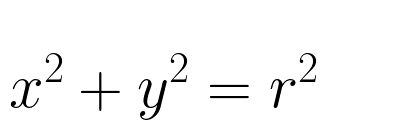

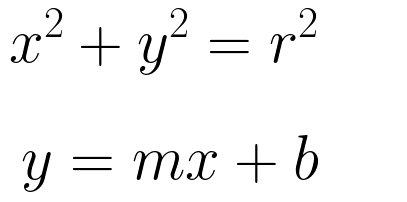

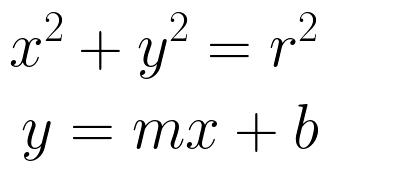

In [15]:
from latex_to_illustrator import generate_latex_equation

# Single equation
equation = "x^2 + y^2 = r^2"
generate_latex_equation(equation, env="aligned", format="svg", save_path="./")

# Multiple equations line-by-line
equations = [
    "x^2 + y^2 = r^2",
    "y = mx + b"
]
generate_latex_equation(equations, env="align", format="pdf", save_path="./")

# Multiple equations at once
equations = r"""
    x^2 + y^2 = r^2 \\
    y = mx + b
"""
generate_latex_equation(equations, env="align", format="pdf", save_path="./")

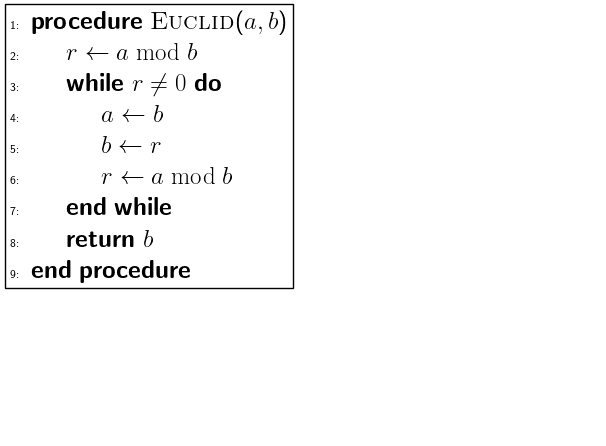

In [16]:
from latex_to_illustrator import generate_algorithm

algorithm= r"""
\begin{algorithmic}[1]
    \Procedure{Euclid}{$a,b$} 
        \State $r\gets a \bmod b$
        \While{$r\not=0$}
            \State $a \gets b$
            \State $b \gets r$
            \State $r \gets a \bmod b$
        \EndWhile\label{euclidendwhile}
        \State \textbf{return} $b$
    \EndProcedure
\end{algorithmic}
"""

generate_algorithm(algorithm, format="svg", save_path="./")

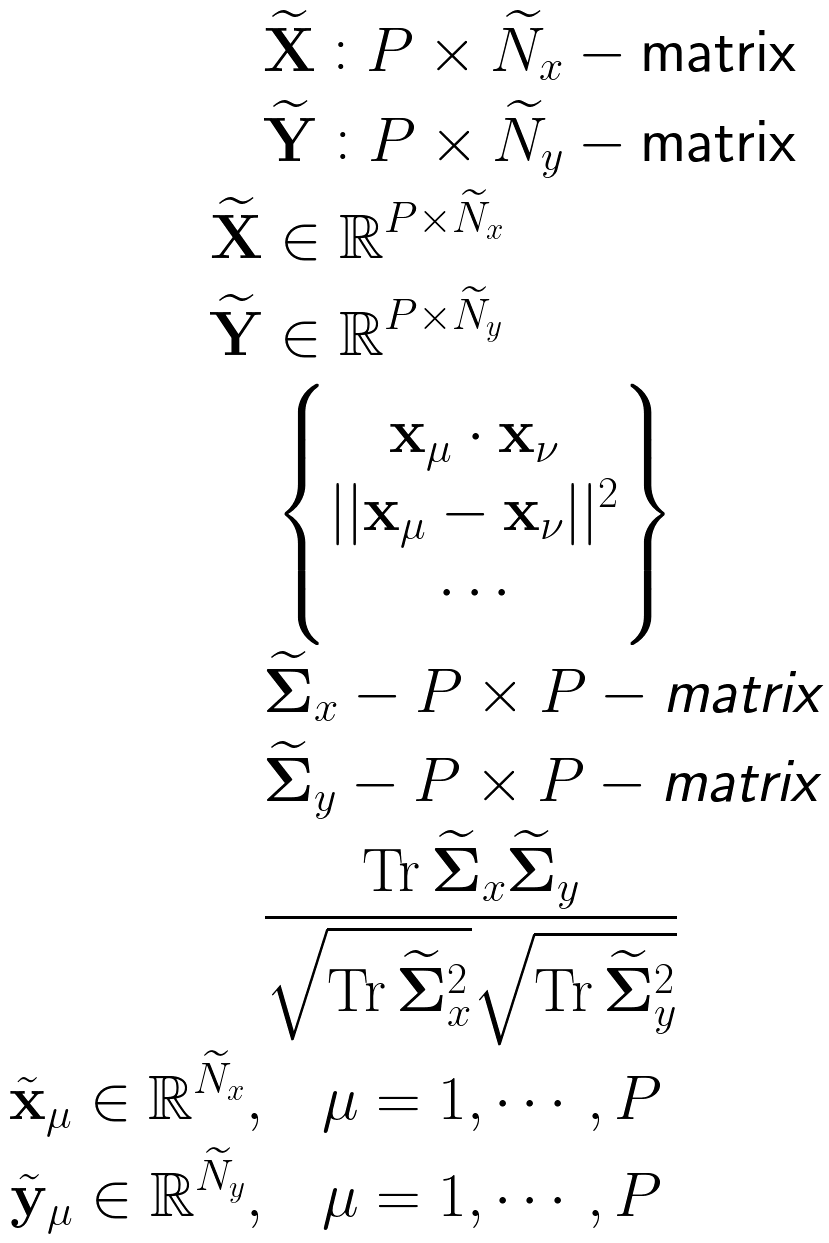

In [18]:
from latex_to_illustrator import generate_latex_equation

latex_equation = r"""
    &\widetilde\X: P \times \widetilde N_x - \text{matrix} \\
    &\widetilde\Y: P \times \widetilde N_y - \text{matrix} \\
    \widetilde\X &\in \bR^{P \times \widetilde N_x} \\
    \widetilde\Y &\in \bR^{P \times \widetilde N_y} \\
    &\begin{Bmatrix} \x_\mu \cdot\x_\nu \\||\x_\mu-\x_\nu||^2 \\ \cdots \end{Bmatrix} \\
    &\widetilde\bSigma_x - P\times P - \textit{matrix} \\
    &\widetilde\bSigma_y - P\times P - \textit{matrix} \\
    &\frac{\Tr \widetilde\bSigma_x\widetilde\bSigma_y}{\sqrt{\Tr \widetilde\bSigma_x^2} \sqrt {\Tr\widetilde\bSigma_y^2}} \\
    \tilde\x_\mu \in \bR^{\widetilde N_x}, &\quad \mu = 1, \cdots, P \\
    \tilde\y_\mu \in \bR^{\widetilde N_y}, &\quad \mu = 1, \cdots, P
"""

# format = "pdf"
format = "svg"

# env = "align"
# env = "alignat"
env = "aligned"

generate_latex_equation(latex_equation, env=env, format=format)